In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder does not exist, download it and prepare it ...
if image_path.is_dir():
  print(f"{image_path} directory already exists... Skipping download")
else:
  print(f"{image_path} does not exist, creating one....")
  image_path.mkdir(parents=True, exist_ok=True)


# Download pizza, steak, and sushi data
with open(data_path/ "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") # rigth click krke raw link copy kr lo
  print("Downloading pizza, steak and sushi data....")
  f.write(request.content)

# unzip pizza, steak , sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one....
Unzipping pizza, steak and sushi data...


directory arrangement : data -> pizza_steak_sushi -> (test,train) -> each classes and corresponding images in both train and test.

In [1]:
## Creating TinyVGG with 'TrivialAugment' Data Augmentation.
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# augmentation is needed only for training data, not for the testing data
test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [3]:
train_dir = 'data/pizza_steak_sushi/train'
test_dir = 'data/pizza_steak_sushi/test'

### Create train and test `Dataset` and `DataLoader` with data augmentation

In [4]:
# Turn image folder into Datasets

from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform = train_transform_trivial)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform = test_transform_simple)

In [5]:
train_data_augmented

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )

In [6]:
test_data_simple

Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [7]:
train_data_augmented[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.0000, 0.1294, 0.1294,  ..., 0.1020, 0.0980, 0.0980],
          [0.0000, 0.0000, 0.1333,  ..., 0.0941, 0.0980, 0.0941],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.1882, 0.1922, 0.1961],
          [0.0000, 0.0000, 0.0000,  ..., 0.1843, 0.1843, 0.1922],
          [0.0000, 0.0000, 0.0000,  ..., 0.1725, 0.1843, 0.1882]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0000, 0.0627, 0.0627,  ..., 0.0784, 0.0745, 0.0706],
          [0.0000, 0.0000, 0.0706,  ..., 0.0745, 0.0745, 0.0745],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.2902, 0.2980, 0.3020],
          [0.0000, 0.0000, 0.0000,  ..., 0.2784, 0.2863, 0.2941],
          [0.0000, 0.0000, 0.0000,  ..., 0.2588, 0.2745, 0.2784]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0000, 0.0196, 0.0157,  ..., 0.0941, 0.0902, 0.0863],
          [0.0000, 0.0000, 0.0196,  ...,

In [10]:
type(train_data_augmented)

torchvision.datasets.folder.ImageFolder

In [12]:
# get classes
class_names = train_data_augmented.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
# get class names as dictionary
class_dict = train_data_augmented.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
# check the lengths of our datasets
len(train_data_augmented), len(test_data_simple)

(225, 75)

data augmentation se acual number of images ki count nhi bdhta hai. During training it gets more without increasing images in the image directory.

In [16]:
print(train_data_augmented.targets) # to see labels. That is solely based on class names in train/ directory. 0 goes to first class, 1 for 2nd and 2 for 3rd class.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [18]:
print(train_data_augmented.samples[0]) # .sample[i] is way to access individual image sample in train directory.

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)


So now we have all the images and corresponding labels stored in train_data_augmented, test_data_simple. This(`ImageFolder`) is the way to load all your custom images into pytorch analysis ready format. Or you can say, now your images have come into your code/model. So `ImageFolder` is required/must when dealing with custom images. Image forlder use krne ke liye, all the images should be arranged in a specific manner. That is something I have followed.

`[ pwd -> data -> pizza_steak_sushi -> (test,train) -> each classes and inside them corresponding images in both train and test ]`

Now further you can load images into dataloaders by `DataLoders` module of pytorch.

In [19]:
# turn the datasets into dataloaders
import torch
from torch.utils.data import DataLoader
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle = True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

# Constructing and training model 1 : model architecture will be same tinyvgg as previous. Just training ke time, original data along with augmented form, will be passed: to see the accuracy change.

In [21]:
from torch import nn

In [35]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape) # trick to get shape
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [37]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=3, bias=True)
  )
)

Try a forward pass on a single image (to get actual shape for classifier layer)

In [38]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_augmented))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [39]:
# Try a forward pass
model_1(image_batch.to(device))

torch.Size([32, 10, 13, 13])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1690 and 0x3)

got the required shape: torch.Size([32, 10, 13, 13]) : so 10 x 13 x 13 we need to put.

NOT 32... BATCH SIZE SE MULTIPLY NHI KRTE.

In [40]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape) # trick to get shape
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusion



torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_1(image_batch.to(device))

tensor([[ 0.0206, -0.0003,  0.0106],
        [ 0.0200,  0.0006,  0.0110],
        [ 0.0216, -0.0037,  0.0104],
        [ 0.0208, -0.0020,  0.0095],
        [ 0.0226, -0.0019,  0.0105],
        [ 0.0163,  0.0049,  0.0066],
        [ 0.0220, -0.0029,  0.0124],
        [ 0.0196, -0.0006,  0.0096],
        [ 0.0200, -0.0020,  0.0094],
        [ 0.0214, -0.0031,  0.0094],
        [ 0.0198,  0.0008,  0.0095],
        [ 0.0192, -0.0007,  0.0123],
        [ 0.0220, -0.0023,  0.0100],
        [ 0.0211, -0.0032,  0.0131],
        [ 0.0205, -0.0041,  0.0111],
        [ 0.0203, -0.0032,  0.0119],
        [ 0.0204, -0.0032,  0.0111],
        [ 0.0223, -0.0026,  0.0106],
        [ 0.0195, -0.0012,  0.0119],
        [ 0.0198, -0.0003,  0.0113],
        [ 0.0226, -0.0064,  0.0087],
        [ 0.0242, -0.0002,  0.0109],
        [ 0.0202,  0.0024,  0.0087],
        [ 0.0247, -0.0031,  0.0110],
        [ 0.0178,  0.0007,  0.0107],
        [ 0.0231, -0.0009,  0.0087],
        [ 0.0218, -0.0006,  0.0075],
 

Hence worked now. Predicted class lebel probabilities for all the 3 classes for each of the 32 images.

Create train and test loops functions

    train_step() - takes in a model and dataloader and trains the model on the dataloader.
    test_step() - takes in a model and dataloader and evaluates the model on the dataloader.


In [41]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [42]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

Creating a train() function to combine train_step() and test_step()

In [43]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

Train and evaluate model 1

In [44]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_1 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device = device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1069 | Train acc: 0.3047 | Test loss: 1.0993 | Test acc: 0.2708
Epoch: 1 | Train loss: 1.1019 | Train acc: 0.3203 | Test loss: 1.0719 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0917 | Train acc: 0.4375 | Test loss: 1.0846 | Test acc: 0.4924
Epoch: 3 | Train loss: 1.0915 | Train acc: 0.3125 | Test loss: 1.0678 | Test acc: 0.5833
Epoch: 4 | Train loss: 1.0862 | Train acc: 0.3594 | Test loss: 1.0751 | Test acc: 0.5331
Total training time for model_1: 10.778 seconds


Not a good model. In terms of accuracy. But without augmentation vale se to better hai.

In [45]:
model_1_results

{'train_loss': [1.1069144010543823,
  1.1019357740879059,
  1.0916990786790848,
  1.0915484577417374,
  1.0861908793449402],
 'train_acc': [0.3046875, 0.3203125, 0.4375, 0.3125, 0.359375],
 'test_loss': [1.0992883841196697,
  1.0718880494435628,
  1.084629972775777,
  1.0677782694498699,
  1.075107455253601],
 'test_acc': [0.2708333333333333,
  0.5416666666666666,
  0.49242424242424243,
  0.5833333333333334,
  0.5331439393939394]}

In [47]:
# Plotting the loss curves of model 1

import matplotlib.pyplot as plt
from typing import Dict, List


def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary(training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out how mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();


In Python, `Dict` and `List` (and `tuple` also) are type hints used for annotating function signatures and specifying the types of variables. They are part of the `typing` module in Python 3, and you need to import them explicitly to use them.

Here's how you can import them:

```python
from typing import Dict, List
```

By adding this import statement at the beginning of your script, you'll resolve the `NameError` and be able to use `Dict` and `List` types in your function signatures.

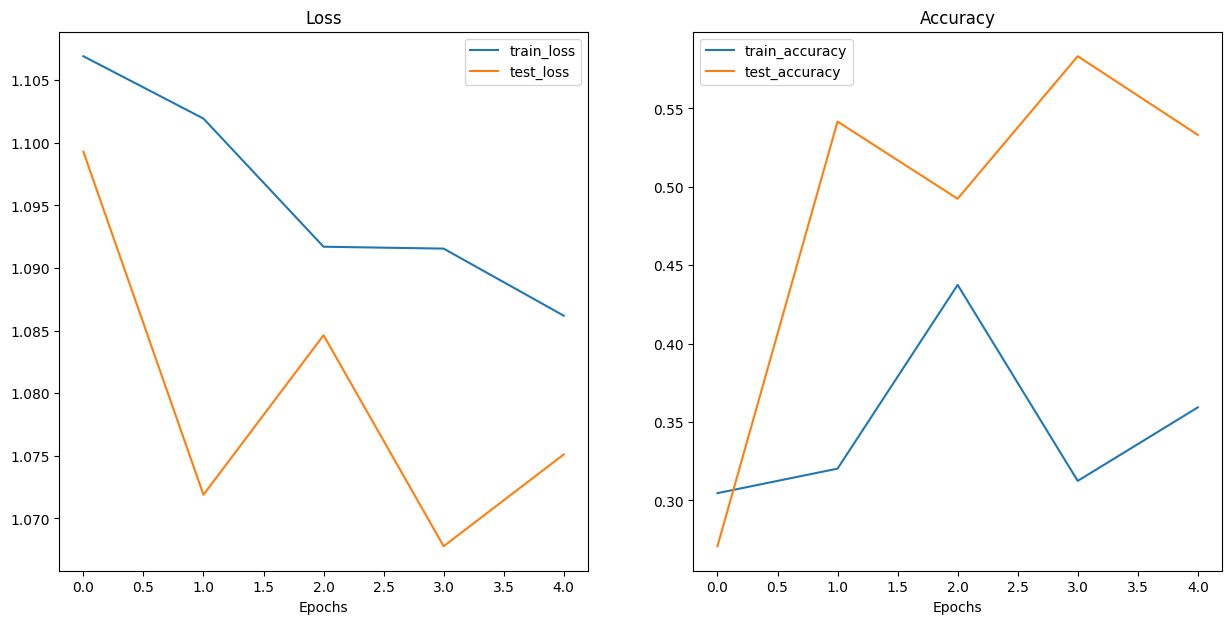

In [48]:
plot_loss_curves(model_1_results)

let's increase epochs to 20 and see the graph then

In [49]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_1 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device = device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1069 | Train acc: 0.3047 | Test loss: 1.0993 | Test acc: 0.2708
Epoch: 1 | Train loss: 1.1019 | Train acc: 0.3203 | Test loss: 1.0719 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0917 | Train acc: 0.4375 | Test loss: 1.0846 | Test acc: 0.4924
Epoch: 3 | Train loss: 1.0915 | Train acc: 0.3125 | Test loss: 1.0678 | Test acc: 0.5833
Epoch: 4 | Train loss: 1.0862 | Train acc: 0.3594 | Test loss: 1.0751 | Test acc: 0.5331
Epoch: 5 | Train loss: 1.0675 | Train acc: 0.5234 | Test loss: 1.0446 | Test acc: 0.6042
Epoch: 6 | Train loss: 1.0762 | Train acc: 0.3477 | Test loss: 1.0023 | Test acc: 0.6146
Epoch: 7 | Train loss: 1.0878 | Train acc: 0.3477 | Test loss: 1.0211 | Test acc: 0.5739
Epoch: 8 | Train loss: 1.0786 | Train acc: 0.4531 | Test loss: 1.0533 | Test acc: 0.2708
Epoch: 9 | Train loss: 1.0918 | Train acc: 0.3516 | Test loss: 1.0986 | Test acc: 0.2812
Epoch: 10 | Train loss: 1.0539 | Train acc: 0.4844 | Test loss: 1.0191 | Test acc: 0.5227
Epoch: 11 | Train lo

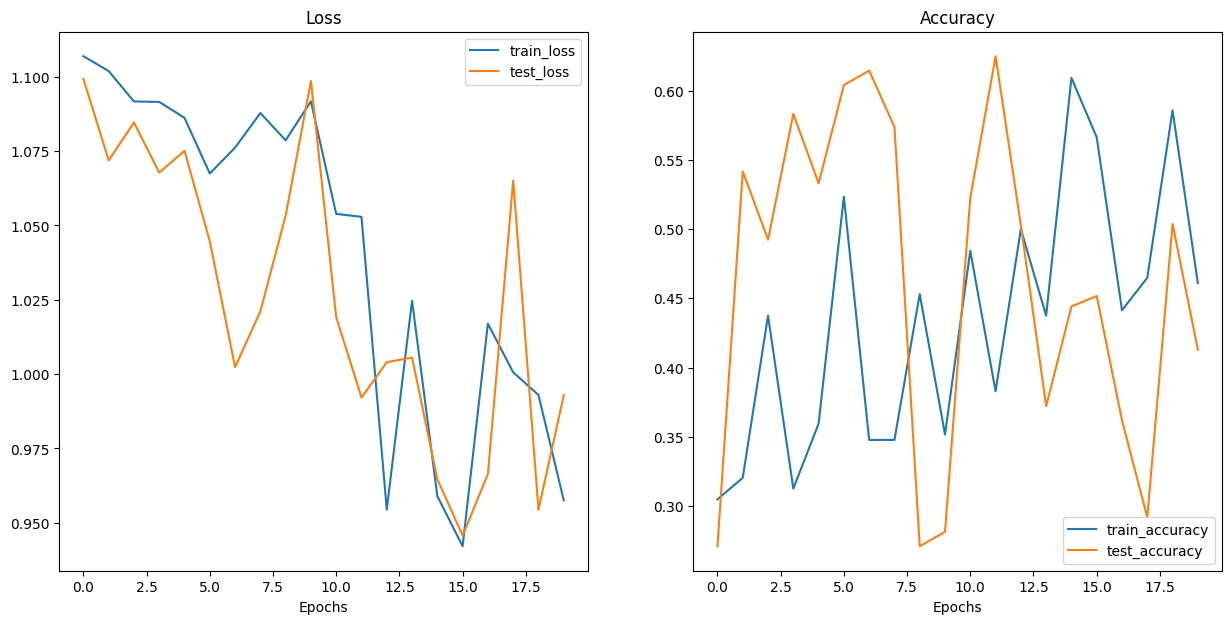

In [50]:
plot_loss_curves(model_1_results)

Loss ghat to rha hai, but accuracy pichli bar ki tarah is bar bhi random hi aa rhi hai.

The main issue i can figure out is very less datapoints in training as well as in testing, for a dl model.

## Once again creating TIMYVGG Model without the data Augmentation. matlab pichli notebook me jo kiye the, going to do the same, Kyonki kl ka result kafi random tha, let's see kuch better hota hai ki nhi.

MODEL 0 : TinyVGG without data augmentation.

7.1 Creating transforms and loading data for Model 0

In [51]:
# Create simple transform
simple_transform = transforms.Compose([
                                       transforms.Resize(size=(64, 64)),
                                       transforms.ToTensor()
])

In [52]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# Create DataLoader's
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

7.2 Create TinyVGG model class

In [53]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # benefits from operator fusio

In [54]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels in our image data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

7.3 Try a forward pass on a single image (to test the model)

In [55]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [56]:
# Try a forward pass
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

7.4 Use torchinfo to get an idea of the shapes going through our model

In [57]:
# Install torchinfo, import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia


7.5 Create train and test loops functions

    train_step() - takes in a model and dataloader and trains the model on the dataloader.
    test_step() - takes in a model and dataloader and evaluates the model on the dataloader.



In [58]:
# Create train_step()
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [59]:
# Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

7.6 Creating a train() function to combine train_step() and test_step()

In [60]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

7.7 Train and evaluate model 0

In [62]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data_simple.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1063 | Train acc: 0.3047 | Test loss: 1.0983 | Test acc: 0.3011
Epoch: 1 | Train loss: 1.0998 | Train acc: 0.3281 | Test loss: 1.0697 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0869 | Train acc: 0.4883 | Test loss: 1.0808 | Test acc: 0.4924
Epoch: 3 | Train loss: 1.0842 | Train acc: 0.3984 | Test loss: 1.0608 | Test acc: 0.5833
Epoch: 4 | Train loss: 1.0662 | Train acc: 0.4141 | Test loss: 1.0654 | Test acc: 0.5644
Epoch: 5 | Train loss: 1.0305 | Train acc: 0.4336 | Test loss: 1.0139 | Test acc: 0.5426
Epoch: 6 | Train loss: 0.9854 | Train acc: 0.4219 | Test loss: 0.9323 | Test acc: 0.5938
Epoch: 7 | Train loss: 0.9663 | Train acc: 0.5781 | Test loss: 0.9987 | Test acc: 0.4432
Epoch: 8 | Train loss: 0.9238 | Train acc: 0.5977 | Test loss: 1.0670 | Test acc: 0.3324
Epoch: 9 | Train loss: 0.9969 | Train acc: 0.4648 | Test loss: 1.0631 | Test acc: 0.4044
Epoch: 10 | Train loss: 0.8699 | Train acc: 0.5195 | Test loss: 0.9761 | Test acc: 0.4830
Epoch: 11 | Train lo

Loss is decreasing till a point. But the accuracy is very random.

7.8 Plot the loss curves of Model 0

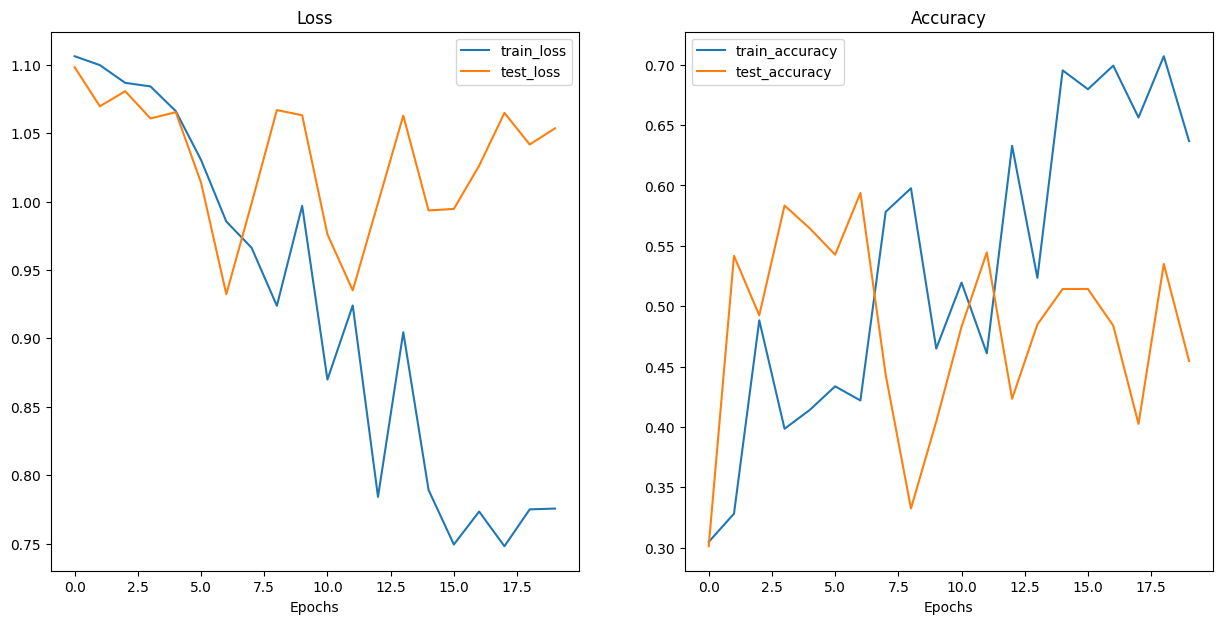

In [63]:
plot_loss_curves(model_0_results)

so we have two models: 0 = simple(no augmented data)

1 = with augmented data.

Dono hi kafi random hain. Major issue may be very less training and testing datapoints.

## Comparing model results side by side

After evaluating our modelling eperiments on their own, it's important to compare them to each other.

There are a few different ways to do this:
1. Hard Coing (what we are doing)
2. PyTorch + TensorBoard
3. Weights and biases
4. MLFlow

In [67]:
import pandas as pd

# Since we have dictionary, we can easily convert it into pandas dataframe.
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

In [68]:
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099806,0.328125,1.069690,0.541667
2,1.086854,0.488281,1.080757,0.492424
3,1.084233,0.398438,1.060832,0.583333
4,1.066216,0.414062,1.065396,0.564394
5,1.030505,0.433594,1.013929,0.542614
6,0.985437,0.421875,0.932304,0.593750
7,0.966291,0.578125,0.998739,0.443182
8,0.923817,0.597656,1.066961,0.332386
9,0.996901,0.464844,1.063138,0.404356


In [69]:
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.106914,0.304688,1.099288,0.270833
1,1.101936,0.320312,1.071888,0.541667
2,1.091699,0.437500,1.084630,0.492424
3,1.091548,0.312500,1.067778,0.583333
4,1.086191,0.359375,1.075107,0.533144
5,1.067476,0.523438,1.044618,0.604167
6,1.076172,0.347656,1.002341,0.614583
7,1.087800,0.347656,1.021133,0.573864
8,1.078631,0.453125,1.053323,0.270833
9,1.091757,0.351562,1.098560,0.281250


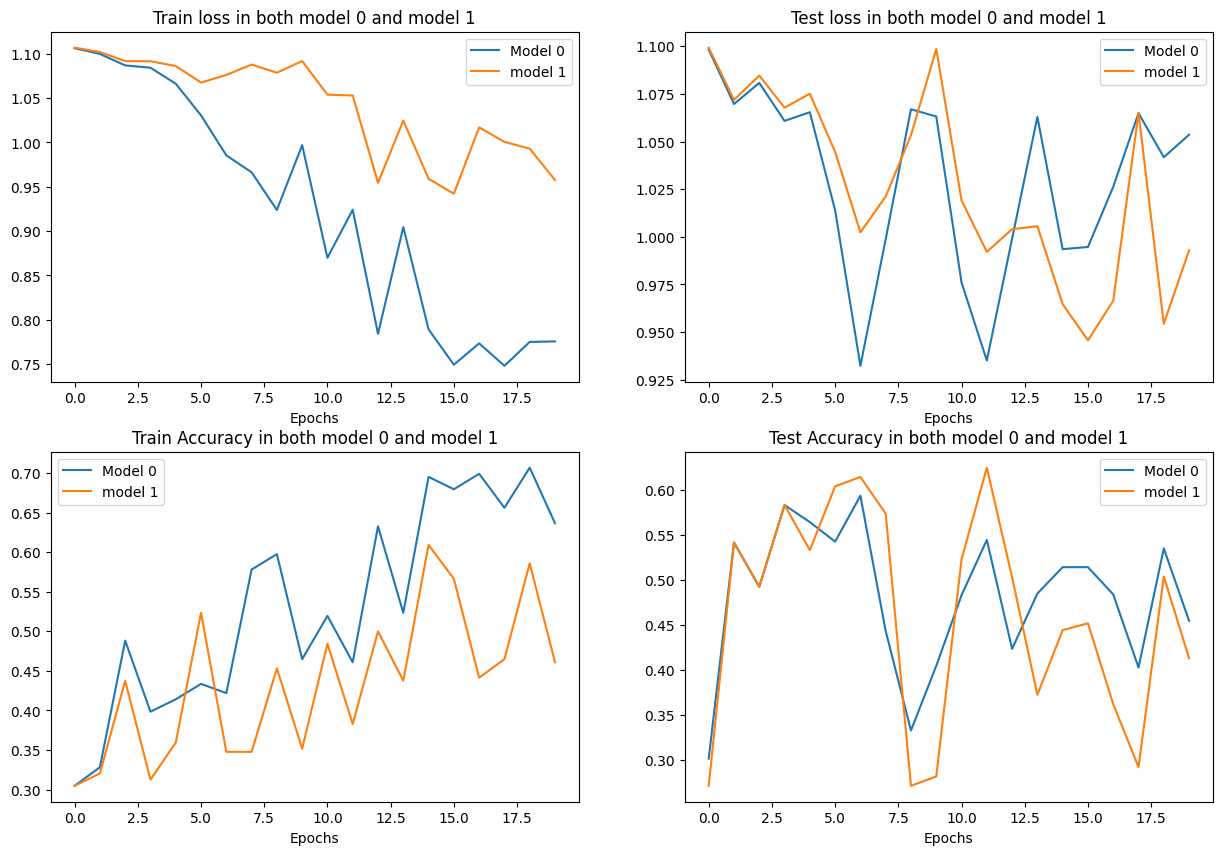

In [72]:
# Comparing by plotting model 1 with model 0 in the same plot : losses and accuracies

plt.figure(figsize=(15,10))

# get number of epochs
epochs = range(len(model_0_df)) # i.e. 20 for both model 0 and model 1

# Plot train loss of both the models in same graph
plt.subplot(2,2,1) # 2 rows, 2 columns , index = 1, here indexing 1 se start hoti hai
plt.plot(epochs, model_0_df['train_loss'],label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="model 1")
plt.title("Train loss in both model 0 and model 1")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss of both the models in same graph
plt.subplot(2,2,2) # 2 rows, 2 columns , index = 2, here indexing 1 se start hoti hai
plt.plot(epochs, model_0_df['test_loss'],label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="model 1")
plt.title("Test loss in both model 0 and model 1")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracies of both the models in same graph
plt.subplot(2,2,3) # 2 rows, 2 columns , index = 3, here indexing 1 se start hoti hai
plt.plot(epochs, model_0_df['train_acc'],label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="model 1")
plt.title("Train Accuracy in both model 0 and model 1")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracies of both the models in same graph
plt.subplot(2,2,4) # 2 rows, 2 columns , index = 4, here indexing 1 se start hoti hai
plt.plot(epochs, model_0_df['test_acc'],label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="model 1")
plt.title("Test Accuracy in both model 0 and model 1")
plt.xlabel("Epochs")
plt.legend()

# Using our model to make prediction on the custom image of the food.

Since model is not good enough, hence don't expect the accurate predictions. Han, agar model accha hota accuracy me, tb ye practical purpose ke liye use kr skte the.

But the below code is going to be general code, useful for every model, irrespective of whether they are good or bad in terms of accuracy.

In [73]:
# Download a custom image
import requests

# setup custom image path
custom_image_path = data_path/"04-pizza-dad.jpeg"

# Dowload the image if it does not already exists
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f: # wb = write binary
    # when downloading from github, need to use the raw file link
    # agar raw option na aaye toh, right click krke open image in new tab krke vo link copy kr lo, that will be raw link. I did the same
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}......")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exixt. Skipping download...")

### Now doing the exact same preprocessing steps on the image. required before prediction input.

We have to make sure our custom image is in the same format as the data our model was trained on.

1. In tensor form with datatype (torch.float32)
2. Of shape 64 x 64 x 3
3. On the right device.

![Daniel Bourke - Learn PyTorch for deep learning in a day. Literally. [Z_ikDlimN6A - 961x541 - 24h54m45s].png](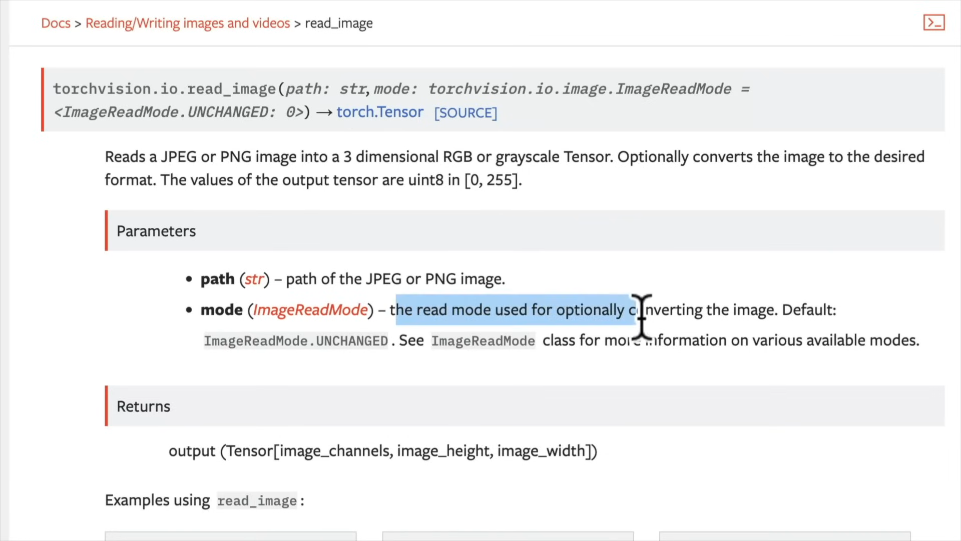)

In [74]:
import torchvision

# read in custom image into pytorch
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
custom_image_uint8

RuntimeError: image::read_file() Expected a value of type 'str' for argument '_0' but instead found type 'PosixPath'.
Position: 0
Value: PosixPath('data/04-pizza-dad.jpeg')
Declaration: image::read_file(str _0) -> Tensor _0
Cast error details: Unable to cast Python instance of type <class 'pathlib.PosixPath'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

path needs to be string, O my God..

In [75]:
# read in custom image into pytorch
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
custom_image_uint8

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

It has read image in integer form. But 0 to 255.

In [76]:
custom_image_uint8.shape

torch.Size([3, 4032, 3024])

It is in default tensor format [ c h w ]

matplotlib wants [h w c]

TypeError: Invalid shape (3, 4032, 3024) for image data

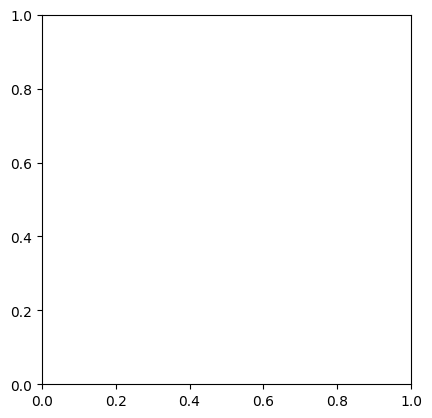

In [77]:
plt.imshow(custom_image_uint8) # default me error dega

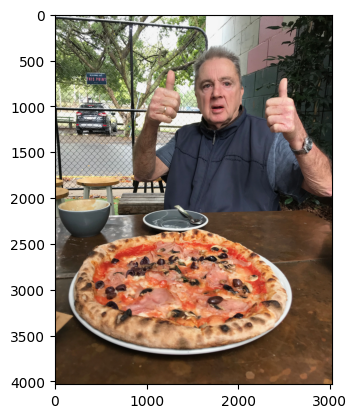

In [78]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [80]:
import torchvision

# read in custom image into pytorch
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape:\n {custom_image_uint8.shape}")
print(f"Custom image datatype:\n {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape:
 torch.Size([3, 4032, 3024])
Custom image dat

This image is 4032 x 3024 pixels = this image incodes lot more information than that on which our model is trained on ( 64 x 64 ).

torch.uint8 hai dtype. Remember this.

torchvision.io.read_image() reads image in uint8 dtype.

### Making a prediction on a custom image with a trained pytorch model

In [81]:
# Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [83]:
# Load int the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image

tensor([[[154., 173., 181.,  ...,  21.,  18.,  14.],
         [146., 165., 181.,  ...,  21.,  18.,  15.],
         [124., 146., 172.,  ...,  18.,  17.,  15.],
         ...,
         [ 72.,  59.,  45.,  ..., 152., 150., 148.],
         [ 64.,  55.,  41.,  ..., 150., 147., 144.],
         [ 64.,  60.,  46.,  ..., 149., 146., 143.]],

        [[171., 190., 193.,  ...,  22.,  19.,  15.],
         [163., 182., 193.,  ...,  22.,  19.,  16.],
         [141., 163., 184.,  ...,  19.,  18.,  16.],
         ...,
         [ 55.,  42.,  28.,  ..., 107., 104., 103.],
         [ 47.,  38.,  24.,  ..., 108., 104., 102.],
         [ 47.,  43.,  29.,  ..., 107., 104., 101.]],

        [[119., 138., 147.,  ...,  17.,  14.,  10.],
         [111., 130., 145.,  ...,  17.,  14.,  11.],
         [ 87., 111., 136.,  ...,  14.,  13.,  11.],
         ...,
         [ 35.,  22.,   8.,  ...,  52.,  52.,  48.],
         [ 27.,  18.,   4.,  ...,  50.,  49.,  44.],
         [ 27.,  23.,   9.,  ...,  49.,  46.,  43.]]]

Now image is in torch float 32.

In [86]:
# Try to make a prediction on an image in float32 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

In [87]:
custom_image.shape

torch.Size([3, 4032, 3024])

one issue 4032 x 3024 ko 64 x 64 me badlna hai.

Another issue, model [0,1] ke beech bna tha, but yhan 0 to 255 hai.

Let's first make it between 0 to 1


In [88]:
# Load int the custom image and convert to torch.float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255.0
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

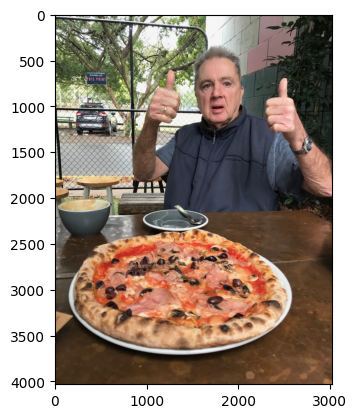

In [89]:
plt.imshow(custom_image.permute(1,2,0))

Original se thoda different hai, but more or less same hai. Thoda color imtensity ghat gyi lg rha.

In [90]:
# resolving shape error
# create transform pipeline to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

In [91]:
custom_image.shape

torch.Size([3, 4032, 3024])

In [92]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

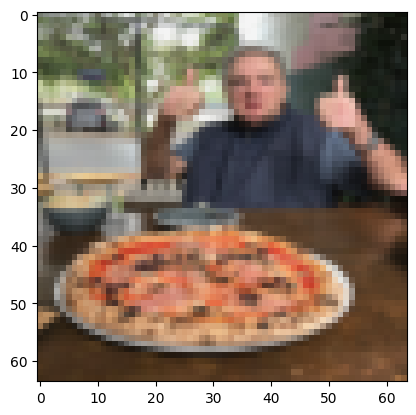

In [93]:
plt.imshow(custom_image_transformed.permute(1,2,0))

This is what our simple model is going to see. HIGH DEFINITION IMAGE SE LOW QUALITY IMAGE.

so 224 x 224 me original model banaye hote toh thoda better accuracy aati model ki.

In [94]:
# Try to make a prediction on an image in float32 and transformed image
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

Oh my God, it expect in batch form.

In [95]:
# Adding batch dimension
custom_image_transformed.shape

torch.Size([3, 64, 64])

We need to pass image as a batch of size 1, to see prediction on it.

In [97]:
custom_image_transformed_batch = custom_image_transformed.unsqueeze(0)
custom_image_transformed_batch.shape

torch.Size([1, 3, 64, 64])

In [100]:
# Try to make a prediction on an image in float32 and transformed and in batch
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed_batch.to(device))
custom_image_pred

tensor([[-3.2349e-04, -1.2138e-01, -3.7538e-01]])

In [101]:
class_names

['pizza', 'steak', 'sushi']

In [102]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.3886, 0.3443, 0.2671]])

In ideal model it must had to be like [ 0.9... , 0.0..., 0.0...]

In [103]:
# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_label

tensor([0])

In [104]:
class_names[custom_image_pred_label]

'pizza'

Oh nice, correct prediction made by the model trained on argumented data. 40% ke aas pas accuracy thi, luckily we got correct predictions.

Note, to make a prediction on a custom image we have to:
* Load the image and turn it into a tensor.
* Make sure the image is in the same datatype as the model (torch.float32)
* Make sure the image is of the same shape as the model was trained on ( 3, 64, 64) with a batch size... (1, 3, 64, 64)
* Make sure the image was on the same device as our model.

# Putting custom image prediction together: building a function

Just need to pass file path

**Ideal outcome:** A function where we pass an image path to and have our model predict on that image and plot the image + prediction.

In [105]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device=device):
  """Makes a prediction on a target image with a trained model and plots the image and prediction."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255.

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimension, e.g. our model will predict on batches of 1x image)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # make sure the target image is on the right device

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  # Convert predction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and rearrange shape to be HWC
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)

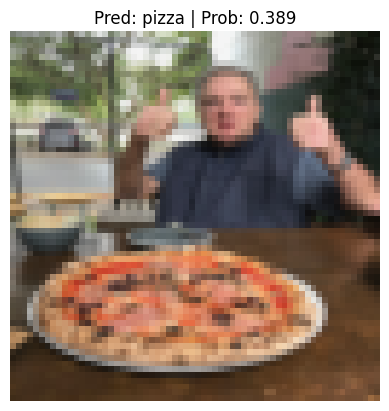

In [107]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

Nice Correct Predictions.

 just by guessing 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂